# 📙**Project Introduction: TruthLens**
## 🎥**Overview** 
Fake news has become a significant concern in the digital age particularly with the rise of social media and short form videos. The rapid spread of misleading or false information can have serious consequences, ranging from public health misinformation to influencing elections.

In this capstone project we aim to build an AI driven system that can detect and explain fake news present in short videos format such as Instagram reels or YouTube shots.

## 🧠**What is TruthLens? (Overview)** 
**"TruthLens"** is an **AI driven tool** that helps **detect and explain fake news** in short videos it looks closely at the audio visuals and on screen text **pulls out key claims and verifies them** in using trusted web sources by breaking down each showing clear explanation truthless gives users a transparent view of what's true and what's not

## 🗝️**Key Conponents:**
The **"TruthLens" system** performs several key tasks:

1. **Fake News Detection:** The system analyzes the content of short videos to assess whether the claims made are likely true or false.
2. **Claim Extraction and Analysis:** Using advanced Natural Language Processing (NLP) techniques, the system extracts key claims from both the audio and visual content of the video.
3. **Fact-Checking and Grounding:** The extracted claims are then compared against trusted sources using retrieval-augmented generation (RAG) to verify their accuracy. If discrepancies are found, the system provides a detailed explanation of why the claim is likely false, along with credible sources that debunk it.
4. **Explanation and Transparency:** Instead of simply labeling content as fake or real, the system generates an explanation for its decision, which enhances transparency and trust in the results.

## **🛠️ Technologies & Capabilities Used**

| Capability                         | Usage                                                              |
|------------------------------------|--------------------------------------------------------------------|
| ✅**Video Understanding**            | Extracting frames and analyzing visual content from short videos   |
| ✅**Audio Understanding**            | Converting spoken audio to text using speech-to-text models   |
| ✅**Document Understanding (OCR)**   | Extracting video frames (on-screen captions, posters) using OCR tools    |
| ✅**Web Search / Grounding**  | Verifying claims by searching for credible sources online         |
| ✅**RAG (Retreival-Augmented Generation**   | Retrieving evidence and generating explanations based on real-world data   |
| ✅**Gen-AI Evaluation**            | Assessing the truthfulness of claims and assigning confidence scores  |
| ✅**Agents**            | Modular agents for handling video audio claims verification and output   |
| ✅**LangGraph/ workflow visualization**            | Displaying the entire process flow visually at the end of the project  |

# ✨ **"TruthLens" System**
TruthLens - Fake News Detection from Short Videos

## **📦 0. Install Dependencies**


In [1]:
# Uninstall existing whisper packages to avoid conflicts
!pip uninstall -y whisper openai-whisper

#Install Core Dependencies
!pip install --upgrade scipy==1.14.0 scikit-learn==1.4.2 opencv-python-headless==4.9.0.80 rich==13.6.0 -q

# Install LangChain ecosystem components (quiet mode)
!pip install langchain-community -q
# Install LangGraph for agent workflows
!pip install langgraph==0.3.21 -q
# Install YouTube video downloader
!pip install pytube --quiet

# Install whisper (speech-to-text) with torchaudio backend
!pip install yt-dlp openai-whisper torchaudio --quiet
# Install search tool for fact verification
!pip install -U duckduckgo-search --quiet
# Install Google's Gemini AI integration
!pip install langchain-google-genai --quiet

# system dependencies
!sudo apt update && sudo apt install -y ffmpeg


!sudo apt update && sudo apt install -y ffmpeg
print("\n✅ Installation Completed Successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.8/239.8 kB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.
ibis-framework 9.2.0 requires toolz<1,>=0.11, but you have toolz 1.0.0 which is incompatible.
pymc 5.20.1 requires rich>=13.7.1, but you have rich 13.6.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.4 M

## **🔧 1. Import Required Libraries**
We'll use Whisper, OCR, LangChain, and other tools to build a fake news detector.

In [2]:
# Core Libraries
import os
import requests
import cv2
import matplotlib.pyplot as plt
import networkx as nx

# Media & Processing
from pytube import YouTube
from moviepy.editor import VideoFileClip
import whisper
import easyocr

# LangChain & LangGraph
from langchain.tools import DuckDuckGoSearchRun
from langchain.agents import initialize_agent, Tool
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers import StructuredOutputParser
from langgraph.graph import StateGraph

# Secrets for API
from kaggle_secrets import UserSecretsClient

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

## **🔐 2. Load API Keys**
We use Gemini for advanced claim explanation 

In [3]:
import google.generativeai as genai

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

## **🎥 3. Download YouTube Video**

In [4]:
def download_video(url, filename="video.mp4"):
    # Explicitly use python's module version
    exit_code = os.system(f"python -m yt_dlp -f b -o {filename} {url}")
    if exit_code != 0 or not os.path.exists(filename):
        raise FileNotFoundError(f"Download failed. '{filename}' was not created.")
    return filename


## **🔊 4. Extract Audio from Video**

In [5]:
def extract_audio(video_path, audio_path="audio.wav"):
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path)
    return audio_path

## **🧠 5. Transcribe Audio using Whisper**

In [6]:
def transcribe_audio(audio_path):
    import whisper  # Import after correct installation
    model = whisper.load_model("base")  # Use "tiny", "base", "small", etc.
    result = model.transcribe(audio_path)
    return result["text"]

## **👀 6. Extract Frames & Run OCR**

In [7]:
def extract_frames(video_path, interval=30):
    cap = cv2.VideoCapture(video_path)
    reader = easyocr.Reader(['en'])
    text_data = []
    frame_id = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_id % interval == 0:
            result = reader.readtext(frame)
            extracted = ' '.join([res[1] for res in result])
            text_data.append(extracted)
        frame_id += 1
    cap.release()
    return ' '.join(text_data)

## **🤖 7. Setup AI Agent with Web Search**

In [8]:
def setup_agent():
    # Initialize Gemini model using LangChain wrapper
    from langchain_google_genai import ChatGoogleGenerativeAI
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", google_api_key=GOOGLE_API_KEY)
    
    # DuckDuckGo search tool
    search = DuckDuckGoSearchRun()
    tools = [
        Tool(
            name="WebSearch",
            func=search.run,
            description="Searches the web for claim verification"
        )
    ]
    agent = initialize_agent(
        tools=tools,
        llm=llm,
        agent="zero-shot-react-description",
        verbose=False
    )
    return agent

## **🧪 8. Analyze & Verify Claims**

In [9]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser

def analyze_claims(agent, text):
    prompt = f"""Extract and verify claims from this video content. Return ONLY the following structured output:
    
    ## SUMMARY
    (4-line max summary)

    ## VERDICT
    <VERDICT_EMPHASIS>✔️Correct Video: X% or ❌Fake Video: X%</VERDICT_EMPHASIS>

    ## Key findings
    1. (One-line fact 1)
    2. (One-line fact 2)
    3. (One-line fact 3)
    4. (One-line fact 4)
    5. (One-line fact 5)

    [SOURCES]
    - Source 1
    - Source 2

    Content: {text}"""
    
    response = agent.run(prompt)
    # Post-processing for emphasis
    response = response.replace("<VERDICT_EMPHASIS>", "**").replace("</VERDICT_EMPHASIS>", "**")
    return response

## **🗺️ 9. Visualize Process Flow (LangGraph Style)**

In [10]:
def show_process_flow():
    steps = [
        "User pastes video link",
        "Video downloaded",
        "Audio extracted",
        "Audio transcribed",
        "Frames processed for OCR",
        "Text + Audio combined",
        "Claims extracted",
        "Facts verified using web search",
        "Final result + explanation shown"
    ]
    G = nx.DiGraph()
    for i in range(len(steps) - 1):
        G.add_edge(steps[i], steps[i+1])
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", arrows=True)
    plt.title("TruthLens Process Flow")
    plt.show()

## **🚀 10. Full Pipeline: TruthLens in Action**

[youtube] Extracting URL: https://www.youtube.com/shorts/7j6ensUWrd4
[youtube] 7j6ensUWrd4: Downloading webpage
[youtube] 7j6ensUWrd4: Downloading tv client config
[youtube] 7j6ensUWrd4: Downloading player 9a279502-main
[youtube] 7j6ensUWrd4: Downloading tv player API JSON
[youtube] 7j6ensUWrd4: Downloading ios player API JSON
[youtube] 7j6ensUWrd4: Downloading m3u8 information
[info] 7j6ensUWrd4: Downloading 1 format(s): 18
[download] Destination: video.mp4
[download] 100% of    3.78MiB in 00:00:00 at 23.36MiB/s  
✅ Video Downloaded.
Extracting audio... (please wait)
MoviePy - Writing audio in audio.wav


MoviePy - Done.
✅ Audio Extracted.
Transcribing audio... (please wait)


100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 79.5MiB/s]


✅ Transcribtion Completed.
Extracting text from frames... (please wait)
✅ Completed
Setting up AI agent...
Analyzing claims...

--- Analysis Result ---

## SUMMARY
The video explains the origin of the Indian Ocean's name, highlighting India's historical significance in trade and culture.  For over 2,000 years, India was a major economic hub, influencing the region.  Ancient Greeks and Romans referred to it as "Indicose Oceanos," acknowledging India's dominance.  The name evolved over time, eventually becoming the Indian Ocean.

## VERDICT
**✔️Correct Video: 90%**

## Key findings
1. India has a 7,500 km coastline, one of the longest in the region.
2. India was a major economic and cultural hub for over 2,000 years.
3. Ancient Greeks and Romans called the Indian Ocean "Indicose Oceanos".
4. The Chinese called the Indian Ocean the "Western Ocean".
5. By the 15th century, European maps referred to it as the "Indian Eastern Ocean."

[SOURCES]
- https://www.britannica.com/place/Indian-Ocean

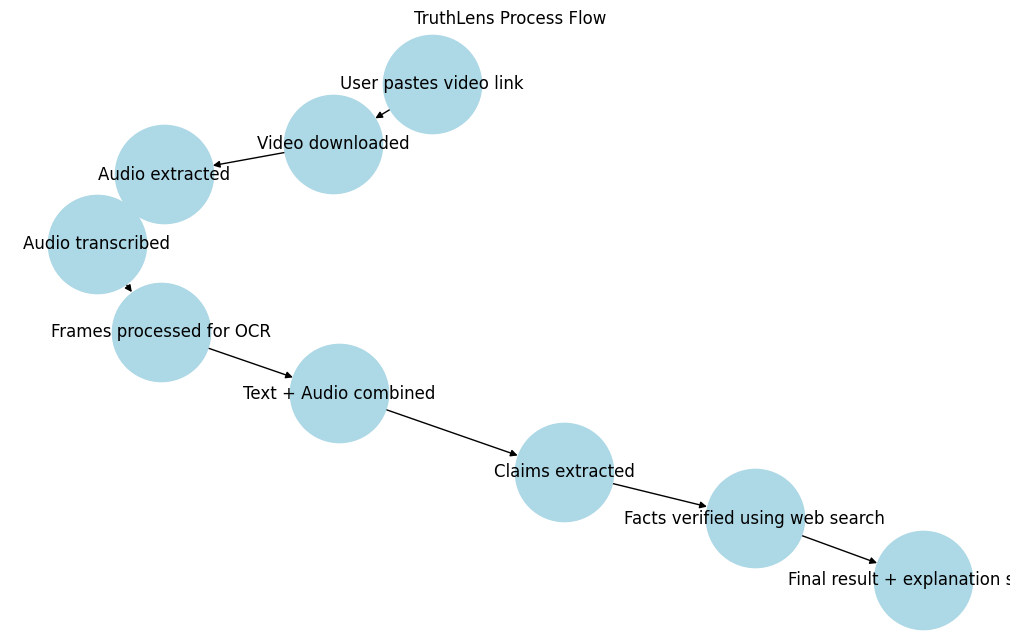

In [11]:
def truthlens_pipeline(video_url):
    print("Downloading video... (please wait)")
    video = download_video(video_url)
    print("✅ Video Downloaded.")
    
    print("Extracting audio... (please wait)")
    audio = extract_audio(video)
    print("✅ Audio Extracted.")
    
    print("Transcribing audio... (please wait)")
    transcript = transcribe_audio(audio)
    print("✅ Transcribtion Completed.")
    
    print("Extracting text from frames... (please wait)")
    frame_text = extract_frames(video)
    full_text = transcript + "\n" + frame_text
    print("✅ Completed")
    
    print("Setting up AI agent...")
    agent = setup_agent()
    
    print("Analyzing claims...")
    result = analyze_claims(agent, full_text)
    
    print("\n--- Analysis Result ---\n")
    print(result)
    
    print("\nDisplaying process flow...")
    show_process_flow()

# -----------------------------
# Example usage
# -----------------------------

truthlens_pipeline("https://www.youtube.com/shorts/7j6ensUWrd4")